In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
df= pd.read_csv('/Users/parichitpithode/Documents/New folder/SEM-III/SBUP Business Analytics/Python & R Programming/DATASETS/Bank_Data.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [11]:
print('data size: {}'.format(df.shape))

data size: (4521, 17)


In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
#Seperating numerical column and categorical column in order to visualise them separately

num_cols= ['age','balance','day','duration','campaign','pdays','previous']
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
cat_cols= [col for col in df.columns if col not in num_cols]
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

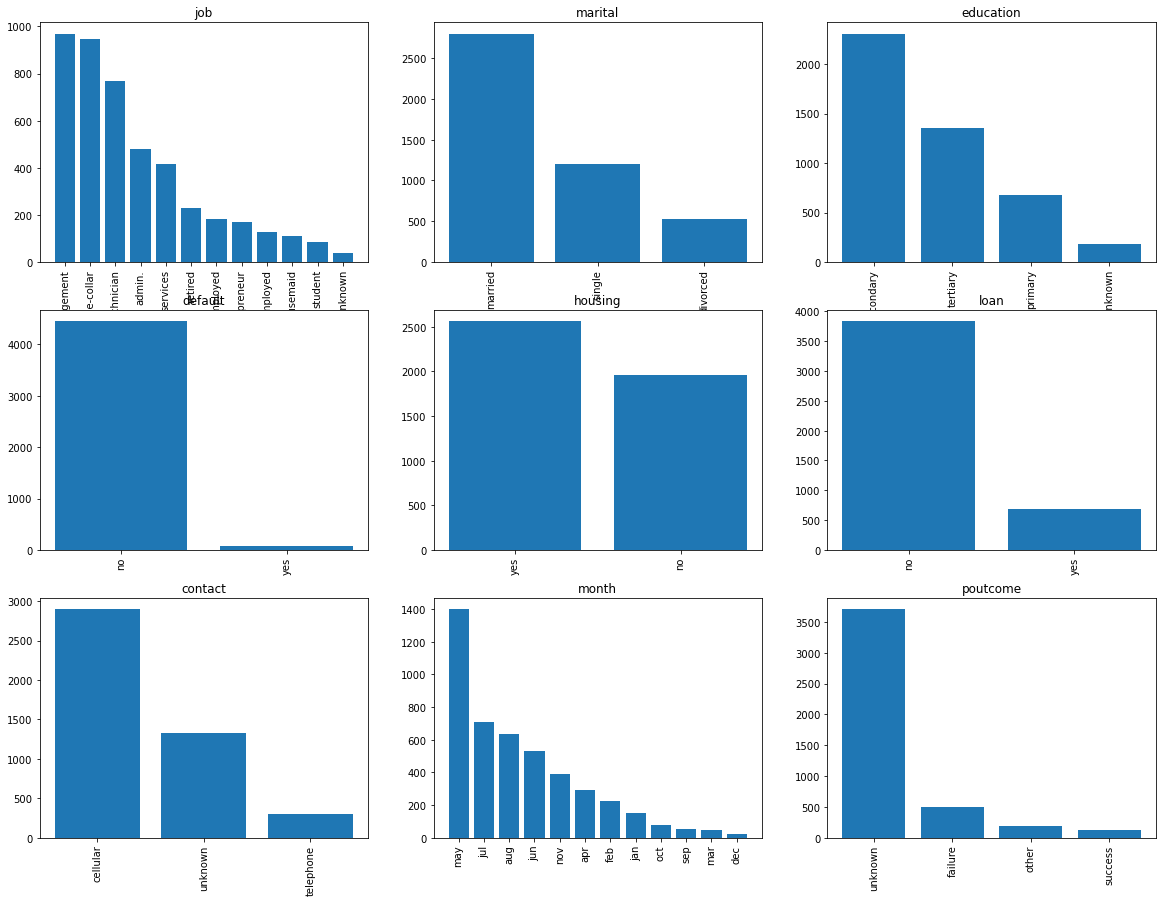

<Figure size 432x288 with 0 Axes>

In [24]:
#Visualising & Modelling

counter=0

fig, axs= plt.subplots(3,3, sharex= False, sharey=False, figsize=(20,15))
for col in cat_cols:
    """"
    Code to plot 9 categorical features on 3*3 grid
    
    """
    
    value_counts = df[col].value_counts()
    trace_x=counter // 3
    trace_y=counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(col)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
    if counter==len(cat_cols)-1:
        break
    

plt.show()
plt.tight_layout()

In [26]:
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


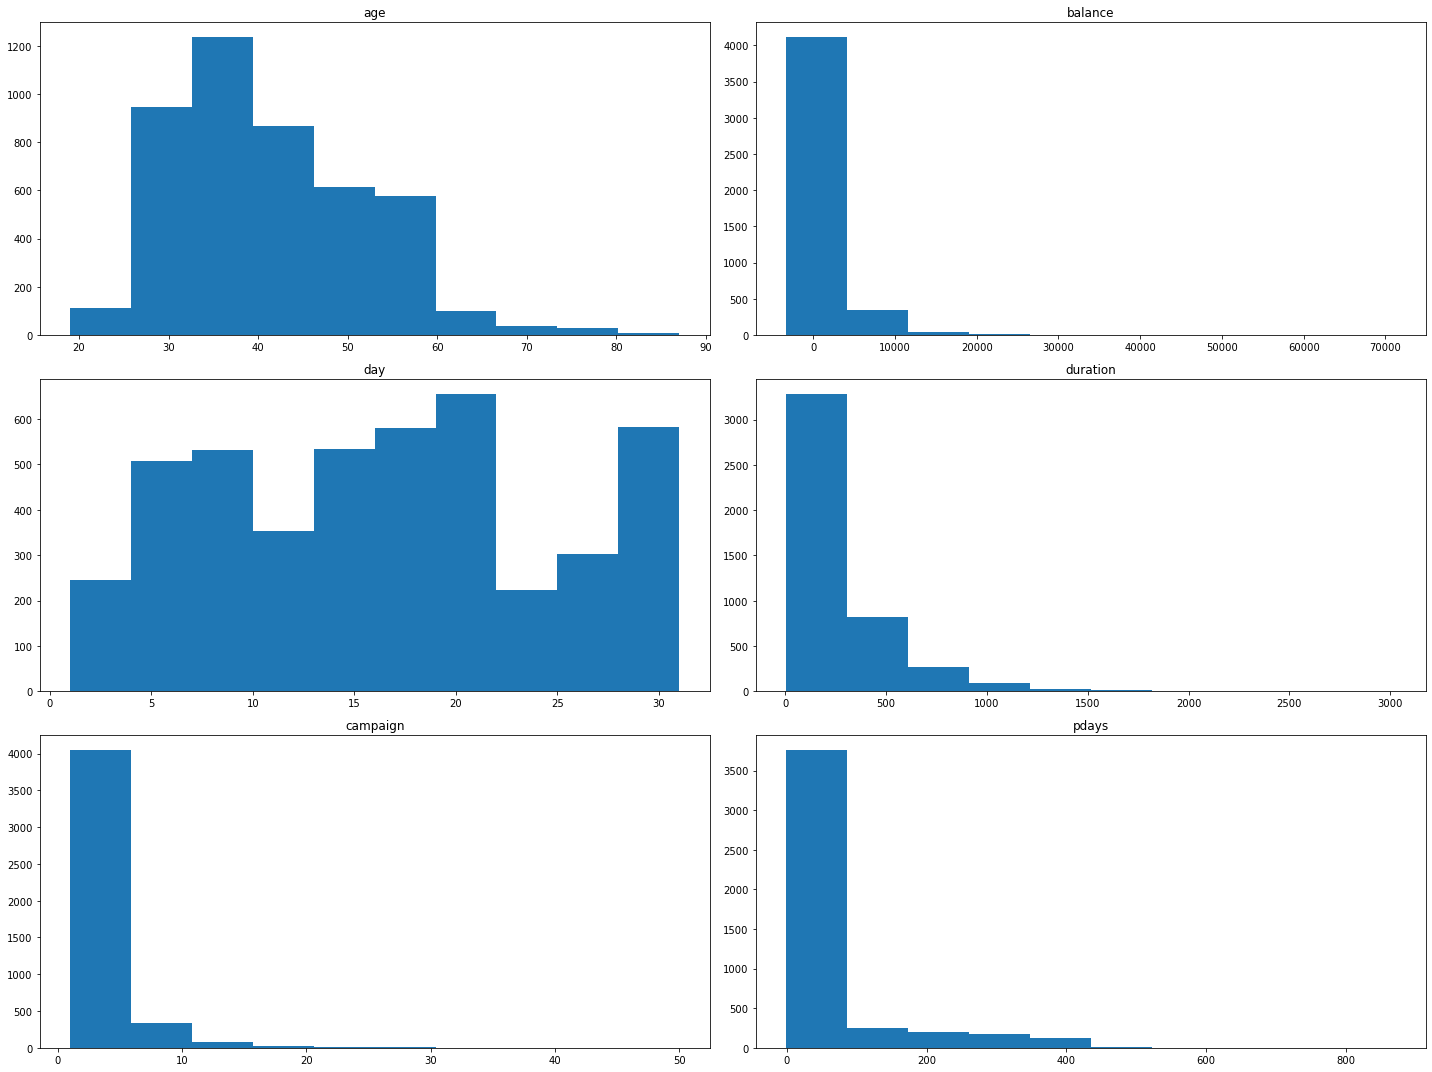

In [30]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_cols):
    """
    Code to plot 6 numrical features in a loop
    
    """
    
    plt.subplot(3,2,i+1)
    plt.hist(df[col])
    plt.title(str(col))
    plt.tight_layout()
    if i==5:
        break

In [35]:
#pdays has an outlier
#lets find and drop the rows in numerical columns if their values are outside of 3 standard devaitions

dt= df[np.abs(df[col]-df[col].mean()) <= (3*df[col].std())]
dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<AxesSubplot:title={'center':'y value counts'}>

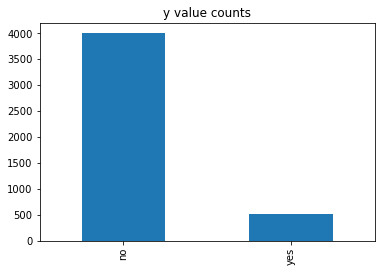

In [59]:
#deposit variable changes

value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'y value counts')

<AxesSubplot:title={'center':'Job and deposit'}>

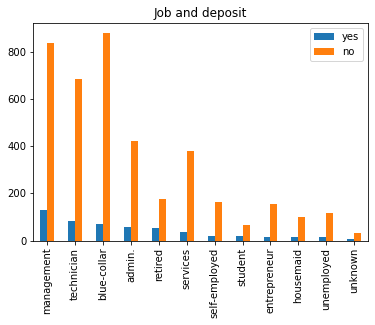

In [65]:
#Relation between features: y & job

job_df = pd.DataFrame()
job_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
job_df['no'] = df[df['y'] == 'no']['job'].value_counts()
job_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

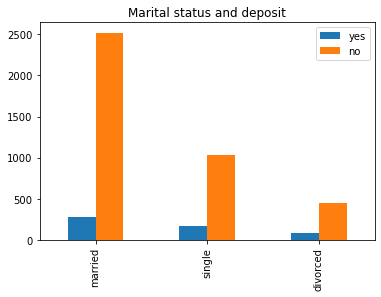

In [66]:
#Check relation btween features: deposit and marital status"""

stat_df = pd.DataFrame()
stat_df ['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
stat_df ['no'] = df[df['y'] == 'no']['marital'].value_counts()
stat_df .plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'education and deposit'}>

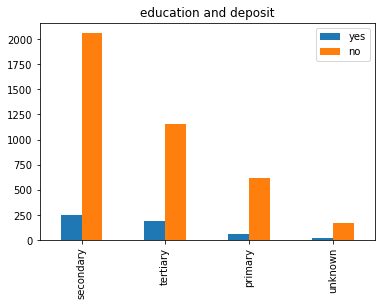

In [67]:
#Check relation btween features: deposit and education"""

stat_df = pd.DataFrame()
stat_df ['yes'] = df[df['y'] == 'yes']['education'].value_counts()
stat_df ['no'] = df[df['y'] == 'no']['education'].value_counts()
stat_df .plot.bar(title = 'education and deposit')

In [ ]:
#Conclusion

#Proportion wise unemployed and retired people are likely to subscribe to the term deposit but on the other hand blue-caller, services, entrepreneur are less likely to sunscribe to term deposit.
#Married people are less likely to sunscribe to term deposit on the other hand single people are more likely to subscribe to term depoit.
#Education does seem to have effect on subscription to term deposit, people with tertiary education more likely to subscribe to term deposit on the other case with secondary education is opposit.